# Santander Kaggle Competition

## 1. Loading the Data:

In [462]:
import pandas as pd
import numpy as np
#Visualising patterns in the data:
import matplotlib.pyplot as plt
import seaborn as sns


#dataset imports
df = pd.read_csv('train.csv')
submit_df = pd.read_csv('test.csv')


#submission_dataset = pd.read_csv('sample_submission.csv')

In [463]:
df.shape

(200000, 202)

## 2. Preprocessing:

### 2.1 Inspecting the dataset:

In [464]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [465]:
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


### 2.2 Visualising the Target Column Distribution:
- Imbalanced dataset

In [395]:
total_0 = 0
total_1 = 0
for col in df.target:
    if(str(col) == "0"):
        total_0 = total_0+1
    else:
        total_1 = total_1+1

print("Total Number of False's: ", total_0)
print("Total Number of True's: ", total_1)

Total Number of False's:  179902
Total Number of True's:  20098


### 2.3 Dealing with Object Column and checking for null values:

In [396]:
train_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [466]:
#detecting object/categorical columns:
non_numb_cols = train_dataset.select_dtypes(exclude=['int64', 'float64']).columns
print(non_numb_cols)
# id_code column can be dropped

Index(['ID_code'], dtype='object')


In [467]:
#dropping the object column:
def dropObjectCol(df):
    return df.drop(['ID_code'], axis=1)
df = dropObjectCol(df)
submit_df = dropObjectCol(submit_df)



In [468]:
df

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [469]:
#checking for null valaues - none found
null_counts = df.isnull().sum()
if(null_counts[1] > 0):
    print(null_counts)
else:
    print("No null values detected")


No null values detected


### 2.4. Visualising the relationship between the columns using a Heatmap diagram:

In [470]:
#matrix to evaluate how each of the columns contributes to the target value:
correlation_matrix = df.corr()

In [402]:
#taking a look at the correlations between the columns:
correlation_matrix["target"].sort_values(ascending=False)

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
             ...   
var_76    -0.061917
var_146   -0.063644
var_12    -0.069489
var_139   -0.074080
var_81    -0.080917
Name: target, Length: 201, dtype: float64

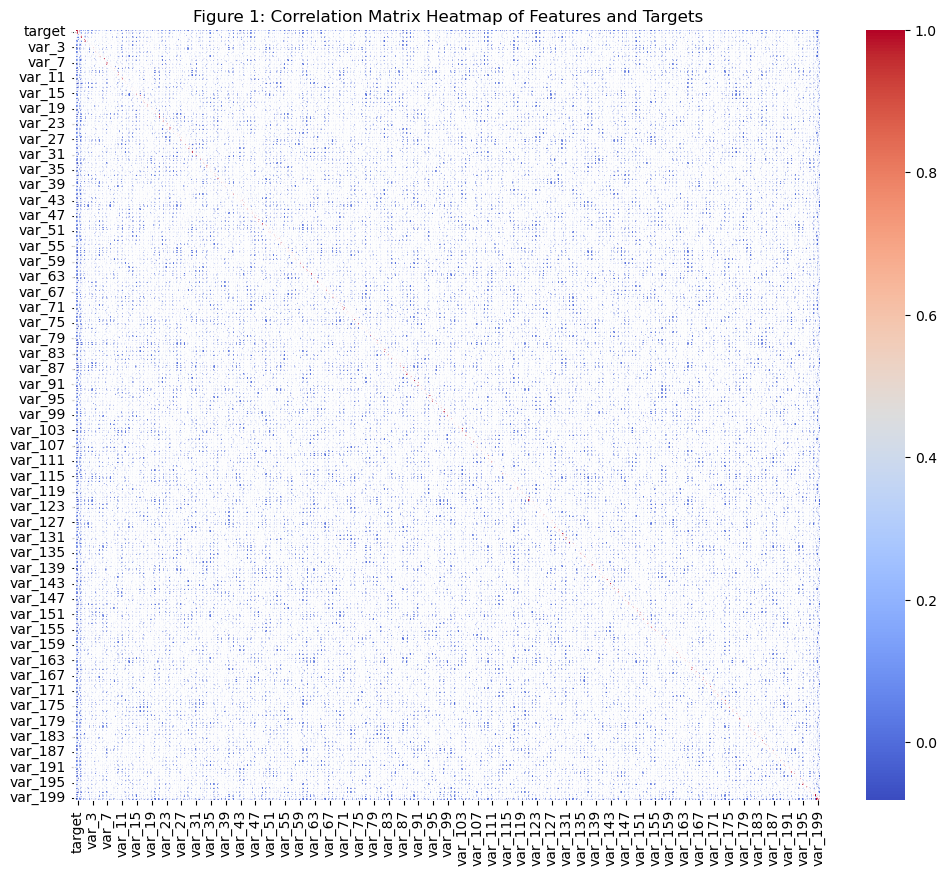

In [383]:
#plotting a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8}, cmap='coolwarm', fmt=".1f")
plt.title('Figure 1: Correlation Matrix Heatmap of Features and Targets')
plt.show()

### 2.5 Spliting the dataset into X and y and then scaling it:

In [471]:
#Spliting the dataset into x and y:
def splitingXandY(df):
    y = df['target']
    X = df.drop('target',axis=1)
    return [X,y]
[X,y] = splitingXandY(df)
print(X)
print(y)


          var_0   var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.6266   
1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208  16.5338   
2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427  14.6155   
3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428  14.9250   
4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.2514   
...         ...     ...      ...     ...      ...      ...     ...      ...   
199995  11.4880 -0.4956   8.2622  3.5142  10.3404  11.6081  5.6709  15.1516   
199996   4.9149 -2.4484  16.7052  6.6345   8.3096 -10.5628  5.8802  21.5940   
199997  11.2232 -5.0518  10.5127  5.6456   9.3410  -5.4086  4.5555  21.5571   
199998   9.7148 -8.6098  13.6104  5.7930  12.5173   0.5339  6.0479  17.0152   
199999  10.8762 -5.7105  12.1183  8.0328  11.5577   0.3488  5.2839  15.2058   

         var_8   var_9  ...  var_190  var_191  var_

In [472]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

def scaling(data):
    cols_to_scale = data.columns
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[cols_to_scale])
    
    scaled_df = pd.DataFrame(scaled_data, columns=cols_to_scale, index=data.index)
    return scaled_df
#Scale the data:
X = scaling(X)

In [473]:
X

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.427853,0.324824,0.568059,0.388041,0.550670,0.467321,0.454298,0.594255,0.270395,0.247420,...,0.569515,0.342943,0.568958,0.448173,0.510975,0.300318,0.678981,0.430958,0.327658,0.560645
1,0.557212,0.428639,0.681235,0.410417,0.628408,0.795072,0.536604,0.500584,0.660911,0.573056,...,0.668079,0.536531,0.523717,0.756190,0.350211,0.765154,0.686614,0.468277,0.609546,0.605827
2,0.411969,0.483777,0.578061,0.599690,0.474941,0.471329,0.753295,0.414724,0.270429,0.276041,...,0.522496,0.643141,0.448960,0.448000,0.671183,0.881350,0.236337,0.381950,0.425833,0.582736
3,0.535099,0.507140,0.396562,0.546993,0.647586,0.616822,0.572995,0.428577,0.224846,0.595326,...,0.570474,0.383085,0.370986,0.439205,0.745555,0.418549,0.346810,0.717176,0.590016,0.443232
4,0.473637,0.533434,0.624133,0.504796,0.621079,0.702836,0.589011,0.622220,0.811883,0.516413,...,0.387371,0.629275,0.299888,0.697737,0.238801,0.393218,0.557507,0.586526,0.591416,0.446041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.556579,0.572293,0.356529,0.268693,0.454064,0.886709,0.544817,0.438719,0.478516,0.236264,...,0.621955,0.820385,0.638836,0.423154,0.485094,0.363660,0.503386,0.425842,0.524105,0.311590
199996,0.226382,0.495472,0.846379,0.504570,0.278944,0.441637,0.579126,0.727071,0.330438,0.282921,...,0.585673,0.378531,0.369513,0.452932,0.705886,0.733666,0.370246,0.129359,0.485652,0.581879
199997,0.543277,0.393057,0.487100,0.429814,0.367884,0.545106,0.361976,0.725420,0.514392,0.305344,...,0.558133,0.419055,0.566240,0.554219,0.771363,0.386767,0.476246,0.456124,0.380873,0.639199
199998,0.467503,0.253090,0.666823,0.440957,0.641783,0.664399,0.606616,0.522131,0.402429,0.666244,...,0.515682,0.584825,0.535995,0.761718,0.609398,0.543576,0.645770,0.674459,0.466617,0.370474


In [408]:
y

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: target, Length: 200000, dtype: int64

### 2.6 Preprocessing Conclusion:
- The heatmap and the correlation matrix show that the target value is not directly influenced by a specific variable but rather a mix of all values 
- In the future I may consider dropping the variables that have a negative correlation to the target (to reduce the number of columns) however that is still up for debate because it may negatively impact my model

## 3. Cross Validation Splits:


In [474]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160000, 200)
(40000, 200)
(160000,)
(40000,)


## 4. Binary Classifier Model Training:

### 4.1 Data Scaling:

### 4.2 Binary Classification Model Training:
- This is clearly a classification task as we only have 2 classes as the target
- For binary classifier the data has to be scaled - scaling the data to be between 0 and 1

In [410]:
#Dataset is imbalanced - adding a class_weight (dataset proportion: 9 to 1)

class_weights = {0: 1, 1: 5}

from sklearn.linear_model import SGDClassifier
#binary classifier:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, class_weight=class_weights)
sgd_clf.fit(X_train, y_train)

#predicting the test set:
y_pred = sgd_clf.predict(X_test)

In [411]:
from sklearn.metrics import f1_score
#y_test
f1_score(y_test,y_pred)


0.4601135345085151

### 4.3 Binary Classifier Grid Search:

In [412]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer, f1_score

param_grid = {'max_iter': [10000,50000,100_000],
              'tol': [1e-4, 1e-3, 0.01]}

#class weight imbalance
class_weights = {0: 1, 1: 5}

#Grid search for target:
sgd_clf = SGDClassifier(random_state=42, class_weight=class_weights)
grid_search = GridSearchCV(estimator=sgd_clf, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score, pos_label=1))
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_iter': 10000, 'tol': 0.0001}


In [427]:
#further grid search:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer, f1_score

param_grid = {'max_iter': [25,50,100,250],
              'tol': [1e-4]}

#class weight imbalance
class_weights = {0: 1, 1: 4}

#Grid search for target:
sgd_clf = SGDClassifier(random_state=42, class_weight=class_weights)
grid_search = GridSearchCV(estimator=sgd_clf, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score, pos_label=1))
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_

Best Parameters:  {'max_iter': 50, 'tol': 0.0001}


C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [475]:
#Final Binary Classifier Model:

#Dataset is imbalanced - adding a class_weight (dataset proportion: 9 to 1)

class_weights = {0: 1, 1: 4}

from sklearn.linear_model import SGDClassifier
#binary classifier:
sgd_clf = SGDClassifier(max_iter=50, tol=0.0001, random_state=42, class_weight=class_weights)
sgd_clf.fit(X_train, y_train)

#predicting the test set:
y_pred = sgd_clf.predict(X_test)
from sklearn.metrics import f1_score
#y_test
f1_score(y_test,y_pred)


C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.485373364126251

### 4.4 Binary Classifier ROC Curve and Report:

In [429]:
# for the same reason as stated in Section 4.6.2
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report) 

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     35915
           1       0.40      0.62      0.49      4085

    accuracy                           0.87     40000
   macro avg       0.68      0.76      0.70     40000
weighted avg       0.90      0.87      0.88     40000



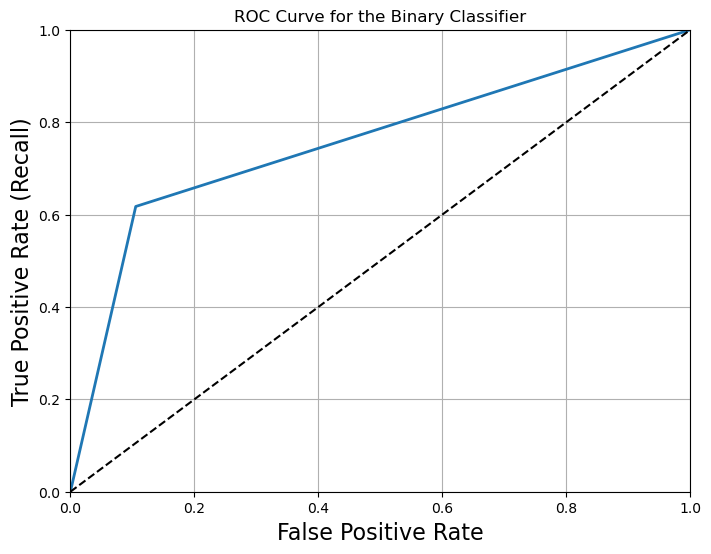

In [430]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Computing ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))   
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1]) 
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.title(label)
    plt.grid(True) 
    plt.show()                                
plot_roc_curve(fpr, tpr, 'ROC Curve for the Binary Classifier')



## 5. MPL Classifier:

In [431]:
X_train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,...,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,0.516370,0.527538,0.498821,0.516832,0.517671,0.552200,0.501725,0.501198,0.522172,0.501290,...,0.532609,0.521933,0.470091,0.502720,0.483936,0.536895,0.507956,0.487987,0.483675,0.527732
std,0.152657,0.159247,0.153249,0.154462,0.140132,0.157760,0.142067,0.153329,0.161481,0.171891,...,0.140151,0.155941,0.121017,0.132866,0.162930,0.149790,0.167545,0.152486,0.152289,0.155031
min,0.000000,0.013658,0.000000,0.000000,0.017505,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002883,0.000000,0.000000,0.031196,0.000000,0.000000,0.000000,0.014404,0.000000,0.000000
25%,0.404640,0.405009,0.383107,0.400083,0.414507,0.429483,0.396417,0.384182,0.396125,0.369253,...,0.431505,0.404401,0.385241,0.411236,0.361408,0.429014,0.377536,0.379516,0.380569,0.410776
50%,0.508512,0.528263,0.490862,0.519050,0.520213,0.556602,0.498008,0.497670,0.527444,0.510007,...,0.531754,0.517183,0.467967,0.504874,0.482318,0.533591,0.511388,0.484437,0.486961,0.535188
75%,0.620759,0.644772,0.603421,0.632303,0.619725,0.672522,0.598977,0.615821,0.650745,0.643167,...,0.630334,0.629172,0.553506,0.598271,0.608909,0.638784,0.638346,0.601344,0.594622,0.649076
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999342,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.998196,1.000000,0.992218,0.997750,1.000000


In [432]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping

#adding a class imbalance:
class_weights = {0: 1, 1: 4}

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoidal actv function

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.3,class_weight=class_weights)


Epoch 1/20
1750/1750 [==============================] - 7s 4ms/step - loss: 0.6407 - accuracy: 0.8684 - val_loss: 0.3565 - val_accuracy: 0.8567
Epoch 2/20
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5667 - accuracy: 0.8699 - val_loss: 0.3837 - val_accuracy: 0.8381
Epoch 3/20
1750/1750 [==============================] - 5s 3ms/step - loss: 0.5647 - accuracy: 0.8707 - val_loss: 0.2891 - val_accuracy: 0.8939
Epoch 4/20
1750/1750 [==============================] - 6s 3ms/step - loss: 0.5608 - accuracy: 0.8701 - val_loss: 0.2683 - val_accuracy: 0.9028
Epoch 5/20
1750/1750 [==============================] - 6s 3ms/step - loss: 0.5585 - accuracy: 0.8707 - val_loss: 0.3163 - val_accuracy: 0.8823
Epoch 6/20
1750/1750 [==============================] - 6s 3ms/step - loss: 0.5549 - accuracy: 0.8729 - val_loss: 0.3443 - val_accuracy: 0.8644
Epoch 7/20
1750/1750 [==============================] - 6s 3ms/step - loss: 0.5574 - accuracy: 0.8745 - val_loss: 0.3002 - val_accuracy:

In [449]:
y_pred = model.predict(X_test)

1250/1250 [==============================] - 2s 2ms/step


In [450]:
y_pred_decimal = pd.DataFrame(y_pred)

y_pred_list = []

#Converting decimal values to boolean with a threshold:
threshold = 0.5
rows_class = 0
for row in y_pred_decimal.values.flatten():
    if(row > threshold):
        rows_class = 1
    else:
        rows_class = 0
    y_pred_list.append(int(rows_class))
    
y_pred = pd.Series(y_pred_list)

In [451]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     35915
           1       0.44      0.57      0.49      4085

    accuracy                           0.88     40000
   macro avg       0.69      0.74      0.71     40000
weighted avg       0.90      0.88      0.89     40000



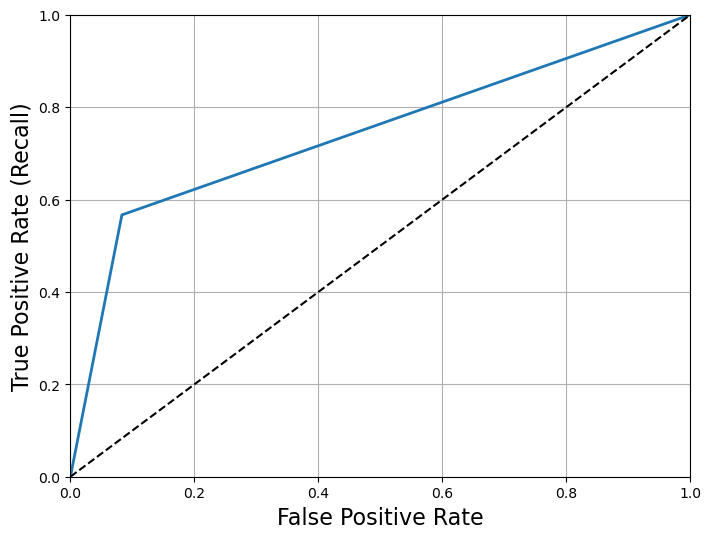

In [452]:
#Computing ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr, label=None)

## 7. Choosing the Best Model and Submiting my Solution:

In [479]:
#I am going to choose the binary classifier:

#quick check for null values:
null_counts = submit_df.isnull().sum()
if(null_counts[1] > 0):
    print(null_counts)
else:
    print("No null values detected")
    
#scaling the dataset:
submission_df = scaling(submit_df)


class_weights = {0: 1, 1: 4}

from sklearn.linear_model import SGDClassifier
#binary classifier:
sgd_clf = SGDClassifier(max_iter=50, tol=0.0001, random_state=42, class_weight=class_weights)
sgd_clf.fit(X, y)

#predicting the test set:
y_pred = sgd_clf.predict(submission_df)


No null values detected


C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [488]:
#writing y_pred to csv:

sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['target'] = y_pred
print(sample_submission_df)

sample_submission_df.to_csv('sample_submission.csv', index=False)

            ID_code  target
0            test_0       0
1            test_1       0
2            test_2       0
3            test_3       0
4            test_4       0
...             ...     ...
199995  test_199995       0
199996  test_199996       0
199997  test_199997       0
199998  test_199998       0
199999  test_199999       0

[200000 rows x 2 columns]


## 8. Taking a look how others tackled this Challenge and Making Notes for the future: 

- The first thing I noticed is that people often used a model called LGBM - light gradient boosting method due to it being efficient and scalable - often used for larget datasets like this one

- The person that came 1st in the competition has shared some tips - first one was that he used data augmentation (I guess to attempt to equalise the dataset and also private pseudo labeling)

- Another point made by the person that won this competition was that he spent a lot longer  analysing the existing dataset - specifically the categorical columns. He has split the features into 5 categories to determine their feature importance and contribution to the output 

"This value appears at least another time in data with target==1 and no 0;
This value appears at least another time in data with target==0 and no 1;
This value appears at least two more time in data with target==0 & 1;
This value is unique in data;
This value is unique in data + test (only including real test samples);"

His answer was a combination of a Neural Network and the LGBM model 